In [ ]:
import itertools
import matplotlib as mpl
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

def Draw_confusion_matrix(cm, target_names, name, cmap='Greys', normalize=False, path = 0):
    plt.rcParams['font.serif'] = "CMU Serif"
    plt.rcParams['font.family'] = "serif"
    plt.rcParams['mathtext.fontset'] = 'cm'
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.size'] = 18
    plt.rcParams['legend.fontsize'] = 24
    plt.rcParams['axes.labelsize'] = 28
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['ytick.labelsize'] = 'small'
    plt.rcParams['xtick.labelsize'] = 'small'
    plt.rcParams['savefig.dpi'] = 600
    # if cmap is True:
    cmap = plt.get_cmap('Blues')


    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.title(title)
    #plt.colorbar()
    plt.clim(0.0,1.0)
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names, rotation =0)

    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]

    # thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    thresh = 0.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{}".format(int(cm[i, j]*1000)),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{}".format(int(cm[i, j]*1000)),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    # plt.xlabel('Predicted label\nAccuracy={:0.3f}; Misclass={:0.3f}'.format(accuracy, misclass))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.savefig(name, bbox_inches='tight', dpi = 300)
    plt.show()
    plt.close()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-sil-gentiumplus fonts-sil-gentiumplus-compact
  fonts-stix fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcups

3675


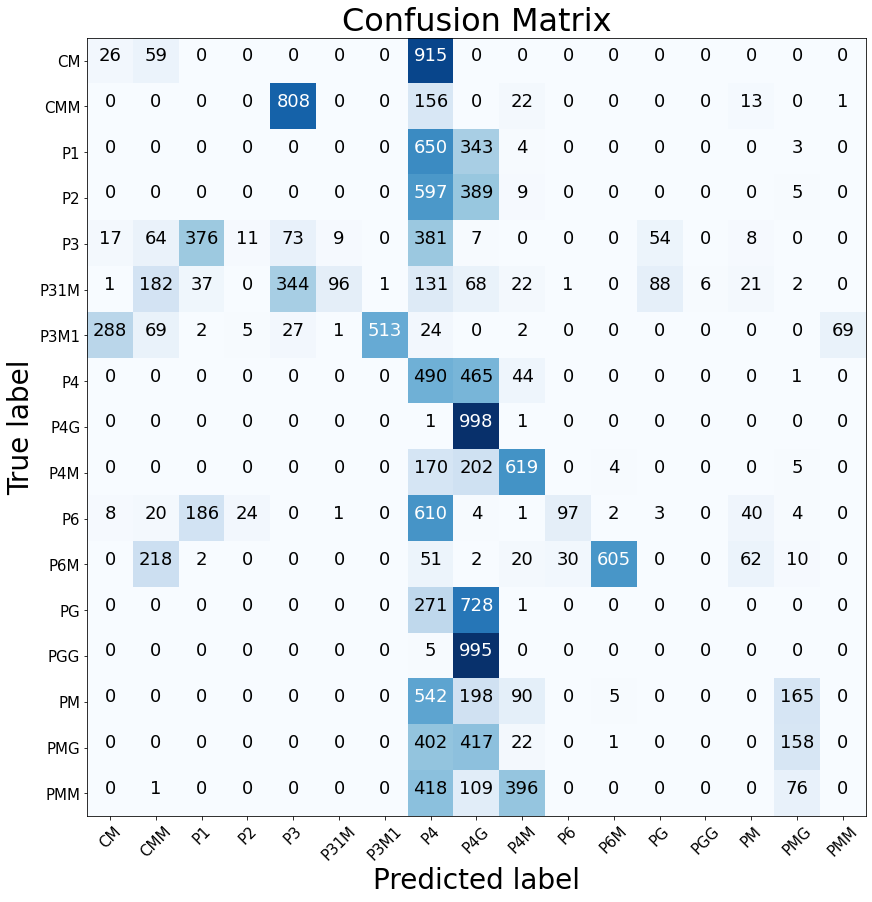

In [ ]:
import sklearn
from sklearn import metrics
import itertools
import numpy as np
import math, os
from numpy import *
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# cm = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])


cm = np.array([[ 26,  59 ,  0,   0  , 0  , 0 ,  0 ,915  , 0,   0  , 0   ,0  , 0 ,  0 ,  0 ,  0  , 0],
 [  0 ,0  , 0 ,  0 ,  808 ,  0 ,  0 ,156  , 0 , 22 ,  0 ,  0 ,  0  , 0 , 13 ,  0  , 1],
 [  0  , 0 ,  0,   0 ,  0,   0 ,  0, 650 ,343  , 4 ,  0 ,  0 ,  0 ,  0 ,  0 ,  3  , 0],
 [  0 ,  0  , 0 ,  0 ,  0 ,  0  , 0 ,597, 389 ,  9 ,  0 ,  0 ,  0 ,  0  , 0  , 5 ,  0],
 [ 17  ,64 ,376 , 11 , 73 ,  9 ,  0 ,381  , 7 ,  0 ,  0,   0  ,54 ,  0,  8 ,  0 ,  0],
 [  1 ,182 , 37 ,  0 , 344 ,96 ,  1, 131 , 68,  22 ,  1 ,  0  ,88,   6  ,21 ,  2 ,  0],
 [288 , 69  , 2 ,  5 , 27 ,  1 ,513  ,24  , 0,   2  , 0 ,  0 ,  0  , 0  , 0 ,  0 , 69],
 [  0  , 0  , 0  , 0  , 0  , 0 ,  0, 490, 465 , 44  , 0  , 0 ,  0  , 0  , 0 ,  1  , 0],
 [  0  , 0 ,  0 ,  0 ,  0 ,  0 ,  0,   1 ,998 ,  1 ,  0 ,  0 ,  0  , 0  , 0 ,  0  , 0],
 [  0  , 0  , 0  , 0 ,  0,   0  , 0 ,170 ,202, 619 ,  0,   4 ,  0 ,  0,   0,   5 ,  0],
 [  8  ,20 ,186 , 24 ,  0   ,1 ,  0 ,610 ,  4  , 1  ,97 ,  2 ,  3  , 0  ,40  , 4  , 0],
 [  0 ,218  , 2 ,  0  , 0  , 0 ,  0  ,51 ,  2 , 20  ,30 ,605  , 0  , 0,  62 , 10  , 0],
 [  0  , 0 ,  0,   0 ,  0   ,0 ,  0, 271, 728 ,  1 ,  0  , 0  , 0  , 0  , 0 ,  0  , 0],
 [  0  , 0,   0,   0  , 0 ,  0  , 0 ,  5 ,995 ,  0 ,  0   ,0   ,0   ,0  , 0  , 0  , 0],
 [  0  , 0 ,  0 ,  0 ,  0 ,  0  , 0 ,542 ,198 , 90  , 0  , 5 ,  0  , 0  , 0 ,165 ,  0],
 [  0   ,0 ,  0 ,  0 ,  0 ,  0 ,  0 ,402 ,417 , 22 ,  0 ,  1  , 0  , 0 ,  0 ,158  , 0],
 [  0   ,1 , 0  , 0  , 0 ,  0 ,  0 ,418 ,109 ,396   ,0   ,0   ,0   ,0  , 0 , 76  , 0]]
)


# cm = np.array([[786,0,14,0,111,0,0,0,89,0,0,0,0,0,0,0,0],
#               [234, 714, 43,0,0,0,0,0,0,0,0,0,0,0,0,0,9],
#                [0, 0, 626,7,0,0,94,0,32,124,0,2,0,0,2,5,108],
#                [0, 0, 2,288,0,0,0,123,161,17,0,0,22,9,0,151,227],
#                [0, 63, 22,0,578,2,0,8,107,0,0,157,0,63,0,0,0],
#                [0, 28, 72,0,0,670,0,0,0,0,0,0,0,0,230,0,0],
#               [1, 0, 310,0,0,0,689,0,0,0,0,0,0,0,0,0,0],
#                 [0, 0, 0,0,0,0,0,643,98,0,243,0,0,0,5,11,0],
#                 [0, 0, 0,0,0,0,0,0,999,0,0,1,0,0,0,0,0],
#                 [0, 0, 70,119,0,381,0,0,0,424,0,0,6,0,0,0,0],
#                 [0, 0, 0,0,0,110,0,116,116,0,551,0,0,0,2,0,105],
#                 [0, 0, 1,0,0,0,0,0,0,0,0,237,0,0,762,0,0],
#                 [0, 0, 0,0,0,3,6,0,0,264,0,0,700,0,10,3,14],
#                 [0, 1, 0,362,0,17,0,0,0,0,0,0,0,600,0,20,0],
#                 [3, 0, 2,0,0,0,28,0,0,17,0,0,0,0,335,187,428],
#                 [0, 16, 2,0,0,3,0,0,0,0,0,0,0,0,0,960,19],
#                 [0, 0, 0,0,0,0,0,0,0,0,75,0,0,0,0,0,925]])

print(np.sum(np.diagonal(cm)))
cm = cm/1000

matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['legend.fontsize'] = 24
matplotlib.rcParams['axes.labelsize'] = 28
matplotlib.rcParams['axes.titlesize'] = 32
matplotlib.rcParams['ytick.labelsize'] = 'large'
matplotlib.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['font.serif'] = "CMU Serif"
plt.rcParams['font.family'] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.unicode_minus'] = False
Draw_confusion_matrix(cm=cm, target_names=['CM', 'CMM', 'P1', 'P2', 'P3', 'P31M',
                                           'P3M1', 'P4', 'P4G', 'P4M', 'P6', 'P6M', 
                                           'PG', 'PGG', 'PM', 'PMG', 'PMM'],
                                            name = 'ConfusionMatrix_Train_2_Resnet_Rotation.png', 
                                            normalize=False)
plt.tight_layout(pad = 0)
plt.close('all')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-extra is already the newest version (2017.20180305-2).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


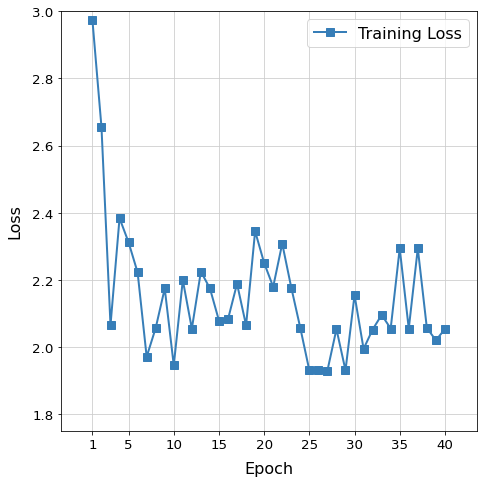

In [ ]:
import numpy as np
import math, os
from numpy import *
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

plt.rcParams['font.serif'] = "CMU Serif"
plt.rcParams['font.family'] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['ytick.labelsize'] = 'small'
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['savefig.dpi'] = 1000

fig=plt.figure(figsize=(7,7))
plt.style.context('dark_background')
legend = ['Training Loss']
Xticks = [1, 5,10,15,20,25,30,35,40]
plt.plot(X, data['Loss'], marker = 's', color = '#377eb8', linewidth=2, markersize=8)

plt.ylabel('Loss', labelpad = 10)
plt.xlabel('Epoch', labelpad = 10)
plt.grid(axis='both', zorder = 0, color='0.8')
plt.ylim(1.75, 3)
plt.xticks(Xticks)
plt.legend(legend)
plt.margins(0.09)
plt.tight_layout()
plt.savefig('Training Loss_Train_2_Resnet.png', dpi = 600)
plt.show()

In [ ]:
import pandas as pd

data = pd.read_csv("/content/results_train_2_densenet.csv")
data['Loss']
X = []
for i in range(1, 41):
  X.append(i)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-extra is already the newest version (2017.20180305-2).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


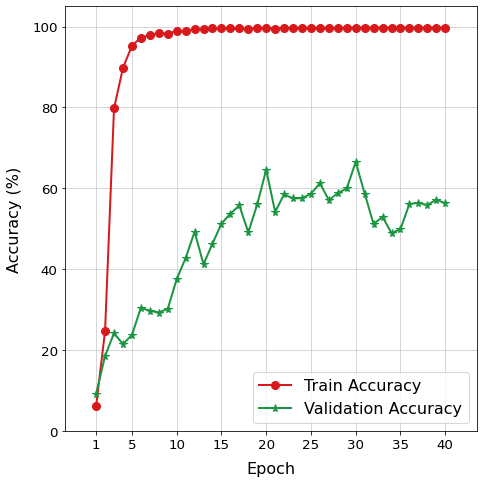

In [ ]:
import numpy as np
import math, os
from numpy import *
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

plt.rcParams['font.serif'] = "CMU Serif"
plt.rcParams['font.family'] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['ytick.labelsize'] = 'small'
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['savefig.dpi'] = 1000

fig=plt.figure(figsize=(7,7))
plt.style.context('dark_background')
legend = ['Train Accuracy', 'Validation Accuracy']


plt.plot(X, data['Train Accuracy'], marker = 'o', color = '#d7191c', linewidth=2, markersize=8)
plt.plot(X, data['Val Accuracy'], marker = '*', color = '#1a9641', linewidth=2, markersize=8)

plt.ylabel('Accuracy (%)', labelpad = 10)
plt.xlabel('Epoch', labelpad = 10)
plt.grid(axis='both', zorder = 0, color='0.8')
plt.ylim(0, 105)
plt.xticks(Xticks)
plt.legend(legend)
plt.margins(0.09)
plt.tight_layout()
plt.savefig('Accuracy_Train_2_Densenet.png', dpi = 600)
plt.show()